<a href="https://colab.research.google.com/github/MRAMIRE/Tesis_Modelo_Deep_Learning_USA/blob/master/5_Resultados.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **VISUALIZACIÓN DE RESULTADOS:**

###FELIPE ANTONIO MELO CIFUENTES

###MARIA CAMILA RAMIREZ FERRO

##### Clonación de repositorio github

In [0]:
import os
if os.path.exists('Tesis_Modelo_Deep_Learning_USA/'):
  !git -C Tesis_Modelo_Deep_Learning_USA/ fetch --all
  !git -C Tesis_Modelo_Deep_Learning_USA/ reset --hard origin/master
  !git -C Tesis_Modelo_Deep_Learning_USA/ pull origin master;
else:
  !git clone https://github.com/MRAMIRE/Tesis_Modelo_Deep_Learning_USA.git
%cd Tesis_Modelo_Deep_Learning_USA/
from utils import *
from Unet import *

Fetching origin
remote: Enumerating objects: 7, done.
remote: Counting objects: 100% (7/7), done.
remote: Compressing objects: 100% (1/1), done.
remote: Total 4 (delta 3), reused 4 (delta 3), pack-reused 0
Unpacking objects: 100% (4/4), done.
From https://github.com/MRAMIRE/Tesis_Modelo_Deep_Learning_USA
   b2ebd02..9cf1ccd  master     -> origin/master
HEAD is now at 9cf1ccd Se agrega net
From https://github.com/MRAMIRE/Tesis_Modelo_Deep_Learning_USA
 * branch            master     -> FETCH_HEAD
Already up to date.
/content/Tesis_Modelo_Deep_Learning_USA


##### Permisos y cambio de directorio:

In [0]:
from google.colab import drive
#Permisos
drive.mount('/gdrive')
#Cambio de Directorio
%cd /gdrive/My\ Drive/Tesis
%ls 

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).
/gdrive/My Drive/Tesis
'1. Exploración de los Datos'                           'Prueba Entrenamiento'
'2. Visualización de la Data.ipynb'                     'Prueba red.ipynb'
'3. Pre-PorcesamientoV2-Data.Pre-PorcesamientoV2-Data'   runs/
'4. Data Set.ipynb'                                      sample_submission.csv
'5. Entrenamiento'                                       set_test.csv
'6. Resultados'                                          set_train.csv
 checkpoints/                                            test_images/
'Copia de 5. Entrenamiento'                              train.csv
 Pre-Porcesamiento-Data                                  train_images/


#####Importar librerias:

In [0]:
import numpy as np
from torch.utils.data import DataLoader
import torch
import torch.nn as nn
import torch.nn.functional as F
from tqdm import tqdm_notebook as tqdm
import pylab as plt
from torch.autograd import Function
from torch import optim
from torch.utils.tensorboard import SummaryWriter
import logging
from torchvision import transforms
from random import randrange

##### Cargue del Modelo

In [0]:
root = 'checkpoints/CP_epoch1.pth'
net = UNet(3,4,2)
net.load_state_dict(torch.load(root))

<All keys matched successfully>

##### DataSet

In [0]:
transform_img = transforms.Compose([transforms.Resize(700) , transforms.ToTensor()])
val_dataset = CloudDataSet(csv_file ='set_test.csv', root_dir='./train_images/',transform = transform_img)

##### Visualización resultados

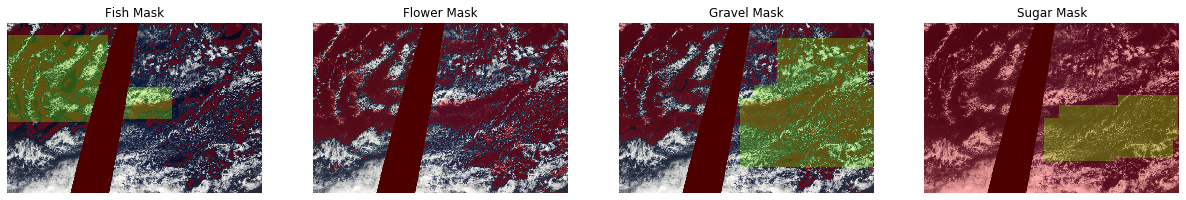

In [0]:
real_vs_pred(350,val_dataset,net,alpha=0.3)